In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
19,800,1,32.00
0,1056,2,39.07
18,2770,3,102.00
12,1000,2,38.00
7,3300,4,155.00


In [3]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

In [4]:
scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df[['price']])
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
np.ones(shape=2)

array([1., 1.])

In [7]:
scaled_x.T.shape

(2, 20)

In [8]:
def batch_gradient_descent(x, y_true, epochs, learning_rate=0.01):
    num_of_ft = x.shape[1]
    w = np.ones(shape=num_of_ft)
    b = 0
    total_samples = x.shape[0]
    
    #just for graph
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_pred = np.dot(w, x.T) + b
                 #w1*area + W2*bedrooms
                 #.T means np.transpose (change row to column)
                 #w = ([1,1])  x.shape(2,20)
                 #here just to make the matrix can be multiplied
        w_grad = -(2/total_samples)*(np.dot(x.T,(y_true-y_pred)))
        b_grad = -(2/total_samples)*np.sum(y_true-y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_pred))
        
        if (i+1)%10==0:
            cost_list.append(cost)
            epoch_list.append(i+1)
    return w, b, cost, cost_list, epoch_list

In [9]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

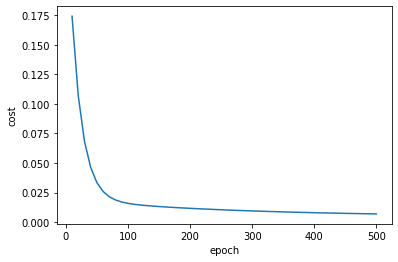

In [10]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [11]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
           #reverse from scale back to real no.

In [12]:
predict(2600,4,w,b)

128.45484403267596

In [13]:
predict(1000,2,w,b)

30.253094462442355

In [14]:
predict(1500,3,w,b)

69.47860785714694

In [15]:
import random

def stochastic_gradient_descent(x, y_true, epochs, learning_rate=0.01):
    num_of_ft = x.shape[1]
    w = np.ones(shape=num_of_ft)
    b = 0
    total_samples = x.shape[0]
    
    #just for graph
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        y_pred = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(np.dot(sample_x.T,(sample_y-y_pred)))
        b_grad = -(2/total_samples)*(sample_y-y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_pred)
        
        if (i+1)%100==0:
            cost_list.append(cost)
            epoch_list.append(i+1)
    return w, b, cost, cost_list, epoch_list

In [16]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.70891567, 0.67695902]), -0.22999944515483206, 0.0018287368689044348)

In [18]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

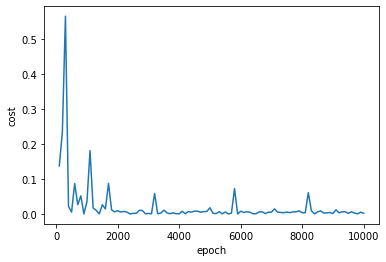

In [17]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [20]:
predict(2600,4,w_sgd,b_sgd)

128.8944192325839